In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
dataset = pd.read_csv("heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
X = dataset.iloc[:,0:12].values
y = dataset.iloc[:,13].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=33)

In [27]:
x_train_temp = pd.DataFrame(X_train)

X_labels = ['age','sex','chest pain type','blood pressure','cholestrol','blood sugar','electrocardiographic results','heart rate','exercise induced angina','ST depression','ST/heart rate slope','calcium']
print(len(X_labels))

12


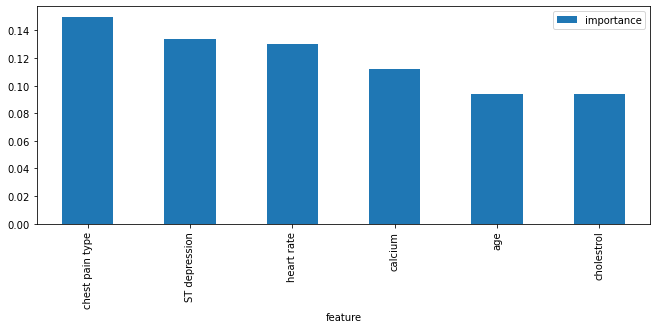

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(x_train_temp, y_train);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_labels,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances[:6].plot.bar();

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
regressor = RandomForestRegressor(n_estimators=5,random_state=22)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [9]:
print(confusion_matrix(y_test,y_pred.round()))

[[131   2]
 [  0 144]]


In [10]:
print(classification_report(y_test,y_pred.round()))
print("Accuracy = ",accuracy_score(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       133
           1       0.99      1.00      0.99       144

    accuracy                           0.99       277
   macro avg       0.99      0.99      0.99       277
weighted avg       0.99      0.99      0.99       277

Accuracy =  0.9927797833935018
